#📌 Extracción

In [107]:
import pandas as pd
import json

# Nombre del archivo JSON
file_name = '/content/TelecomX_Data.json'

# Cargar el archivo JSON
try:
    with open(file_name, 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print(f"Error: El archivo '{file_name}' no se encuentra.")
    exit()



# Normalizar los datos para aplanar completamente la estructura anidada.
# pandas se encargará de crear columnas con nombres anidados (usando puntos).
df = pd.json_normalize(data)

# Imprimir las primeras filas del DataFrame para que veas el resultado
print("DataFrame resultante con la estructura aplanada:")
print(df.head())
print("\nColumnas del DataFrame:")
print(df.columns)

DataFrame resultante con la estructura aplanada:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes        

In [108]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [109]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [110]:
import numpy as np


# Reemplazar los espacios en blanco por valores nulos
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)

# Convertir la columna a float64 y rellenar los valores nulos con 0
df['account.Charges.Total'] = df['account.Charges.Total'].astype(np.float64).fillna(0)

In [111]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [112]:

# 1. Valores ausentes
missing_values = df['customerID'].isnull().sum()
print(f"Número de valores ausentes en 'customerID': {missing_values}")
print("-" * 50)

# 2. Duplicados
duplicate_rows = df['customerID'].duplicated().sum()
print(f"Número de valores duplicados en 'customerID': {duplicate_rows}")
print("-" * 50)

# 3. Formato e inconsistencias (validar si todos son cadenas de texto)
if all(isinstance(x, str) for x in df['customerID']):
    print("Todos los valores en 'customerID' son cadenas de texto (strings).")
    # Para una validación más profunda, puedes revisar la longitud o el patrón
    # Por ejemplo, verificar que todos tengan 10 caracteres
    if all(len(x) == 10 for x in df['customerID']):
        print("Todos los customerID tienen 10 caracteres de longitud.")
    else:
        print("Hay customerID con longitudes inconsistentes.")
else:
    print("Hay valores en 'customerID' que no son cadenas de texto.")

Número de valores ausentes en 'customerID': 0
--------------------------------------------------
Número de valores duplicados en 'customerID': 0
--------------------------------------------------
Todos los valores en 'customerID' son cadenas de texto (strings).
Todos los customerID tienen 10 caracteres de longitud.


In [106]:
# Creación de la columna "Cuentas_Diarias"

# Asumimos que un mes tiene un promedio de 30 días para el cálculo.
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

# Mostrar las primeras filas del DataFrame para ver la nueva columna
print("DataFrame con la nueva columna 'Cuentas_Diarias':")
print(df.head())
print("\nTipos de datos actualizados:")
print(df.info())

DataFrame con la nueva columna 'Cuentas_Diarias':
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes       

#🔧 Transformación

In [113]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035
std,0.369074,24.571773,30.129572,2268.648587
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.425000,396.200000
50%,0.000000,29.000000,70.300000,1389.200000
75%,0.000000,55.000000,89.875000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000


#📊 Carga y análisis

/tmp/ipython-input-285875492.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_filtered, palette='deep', order=df_filtered['Churn'].value_counts().index)


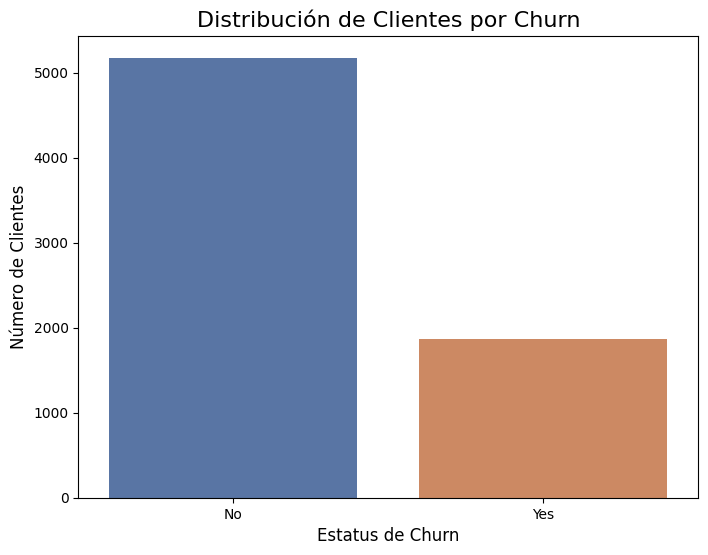

In [125]:
#  Visualización de la distribución de 'Churn'  evasión
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el DataFrame para incluir solo 'Yes' o 'No' en 'Churn'
df_filtered = df[df['Churn'].isin(['Yes', 'No'])].copy()



# Gráfico de barras (Count Plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_filtered, palette='deep', order=df_filtered['Churn'].value_counts().index)
plt.title('Distribución de Clientes por Churn', fontsize=16)
plt.xlabel('Estatus de Churn', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()


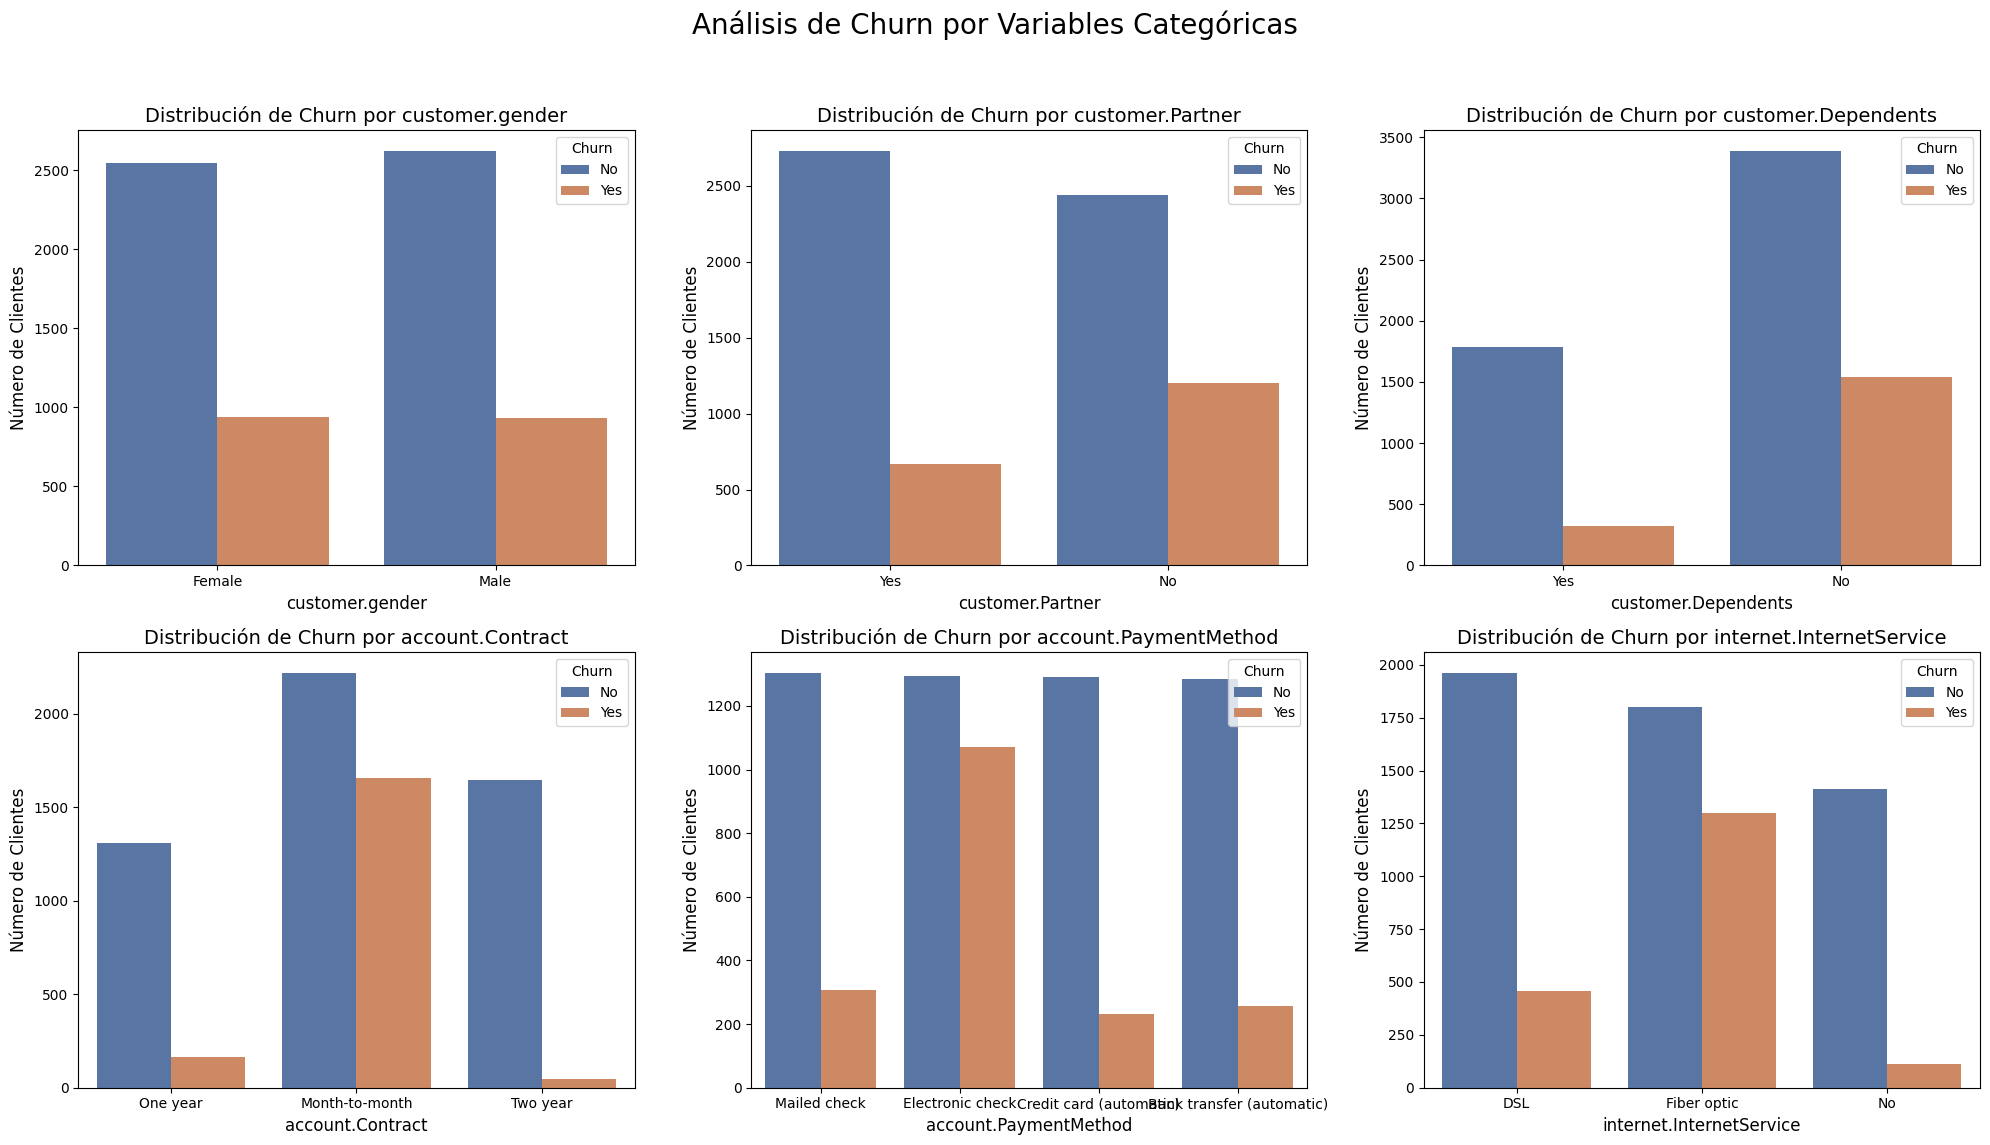

In [130]:


# Lista de variables categóricas a analizar
categorical_vars = ['customer.gender', 'customer.Partner', 'customer.Dependents', 'account.Contract', 'account.PaymentMethod', 'internet.InternetService']

# Crear un subplot para mostrar múltiples gráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
fig.suptitle('Análisis de Churn por Variables Categóricas', fontsize=20)

for i, var in enumerate(categorical_vars):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.countplot(x=var, hue='Churn', data=df_filtered, palette='deep', ax=ax)
    ax.set_title(f'Distribución de Churn por {var}', fontsize=14)
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Número de Clientes', fontsize=12)
    ax.legend(title='Churn', loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/tmp/ipython-input-4230001844.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df_filtered, palette='viridis', ax=axes[i, 0])
/tmp/ipython-input-4230001844.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df_filtered, palette='viridis', ax=axes[i, 0])
/tmp/ipython-input-4230001844.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df_filtered, palette='viridis', ax=axes[i, 0])


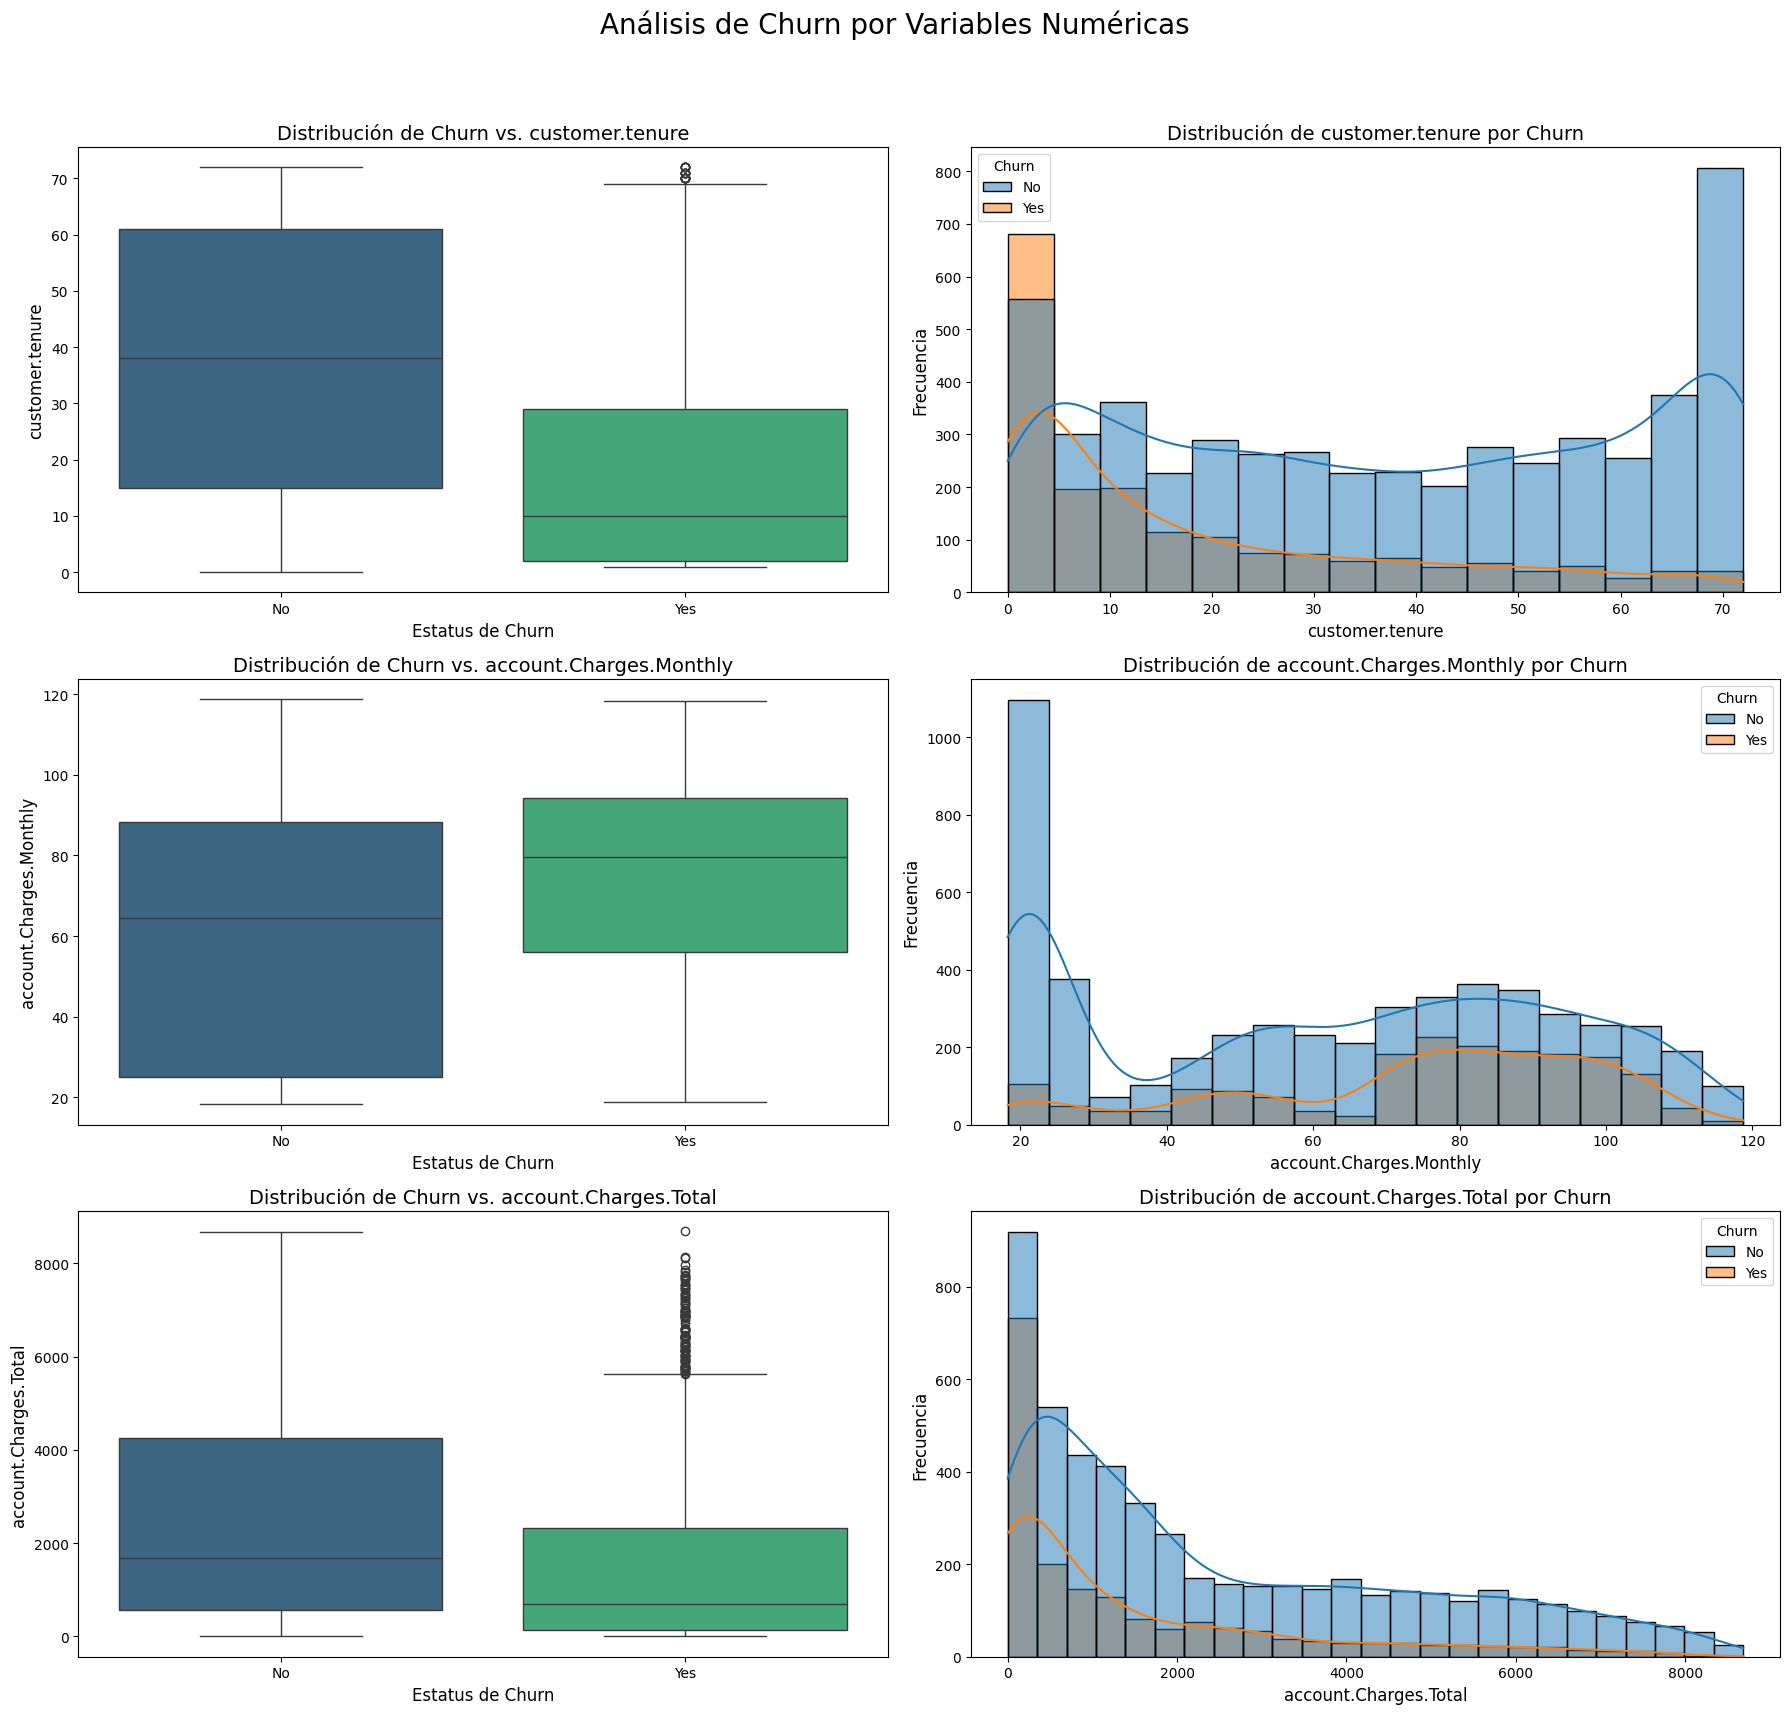

In [129]:
# Lista de variables numéricas a analizar
numeric_vars = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Crear un subplot para mostrar múltiples gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
fig.suptitle('Análisis de Churn por Variables Numéricas', fontsize=20)

for i, var in enumerate(numeric_vars):
    # Gráfico de Caja (Box Plot)
    sns.boxplot(x='Churn', y=var, data=df_filtered, palette='viridis', ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribución de Churn vs. {var}', fontsize=14)
    axes[i, 0].set_xlabel('Estatus de Churn', fontsize=12)
    axes[i, 0].set_ylabel(var, fontsize=12)

    # Histograma con densidad (KDE Plot)
    sns.histplot(data=df_filtered, x=var, hue='Churn', kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribución de {var} por Churn', fontsize=14)
    axes[i, 1].set_xlabel(var, fontsize=12)
    axes[i, 1].set_ylabel('Frecuencia', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#📄Informe final

Informe de Análisis de Evasión de Clientes (Churn)

1. Introducción

El objetivo fue explorar y comprender los factores que influyen en la evasión de clientes (Churn) de la empresa de telecomunicaciones. El Churn representa a los clientes que han cancelado sus servicios y es una métrica crítica, ya que la retención de clientes es, a menudo, más rentable que la adquisición de nuevos. A través de este informe, se busca identificar patrones y causas de la evasión para poder formular estrategias que ayuden a mitigarla.

2. Limpieza y Tratamiento de Datos
El análisis comenzó con la importación de un archivo JSON que contenía datos de clientes. Para preparar los datos, se realizaron los siguientes pasos clave:

Normalización de Datos: Se utilizó pd.json_normalize para normalizar la estructura anidada del JSON, convirtiendo campos como customer.gender y account.Charges.Total en columnas separadas.


Manejo de Errores de Formato: La columna 'account.Charges.Total' contenía espacios en blanco, lo que causaba un ValueError al intentar convertirla a un tipo numérico. Este problema se resolvió reemplazando los espacios en blanco por valores nulos (NaN) y luego rellenándolos con 0, permitiendo la conversión a float.

Creación de Nuevas Características: Se creó la columna Cuentas_Diarias a partir de los cargos mensuales para proporcionar una visión más detallada de los gastos de los clientes.

Filtro de Datos Inconsistentes: Se filtró el DataFrame para asegurar que la columna Churn solo contuviera los valores 'Yes' y 'No', eliminando cualquier inconsistencia para un análisis preciso.

3. Análisis Exploratorio de Datos

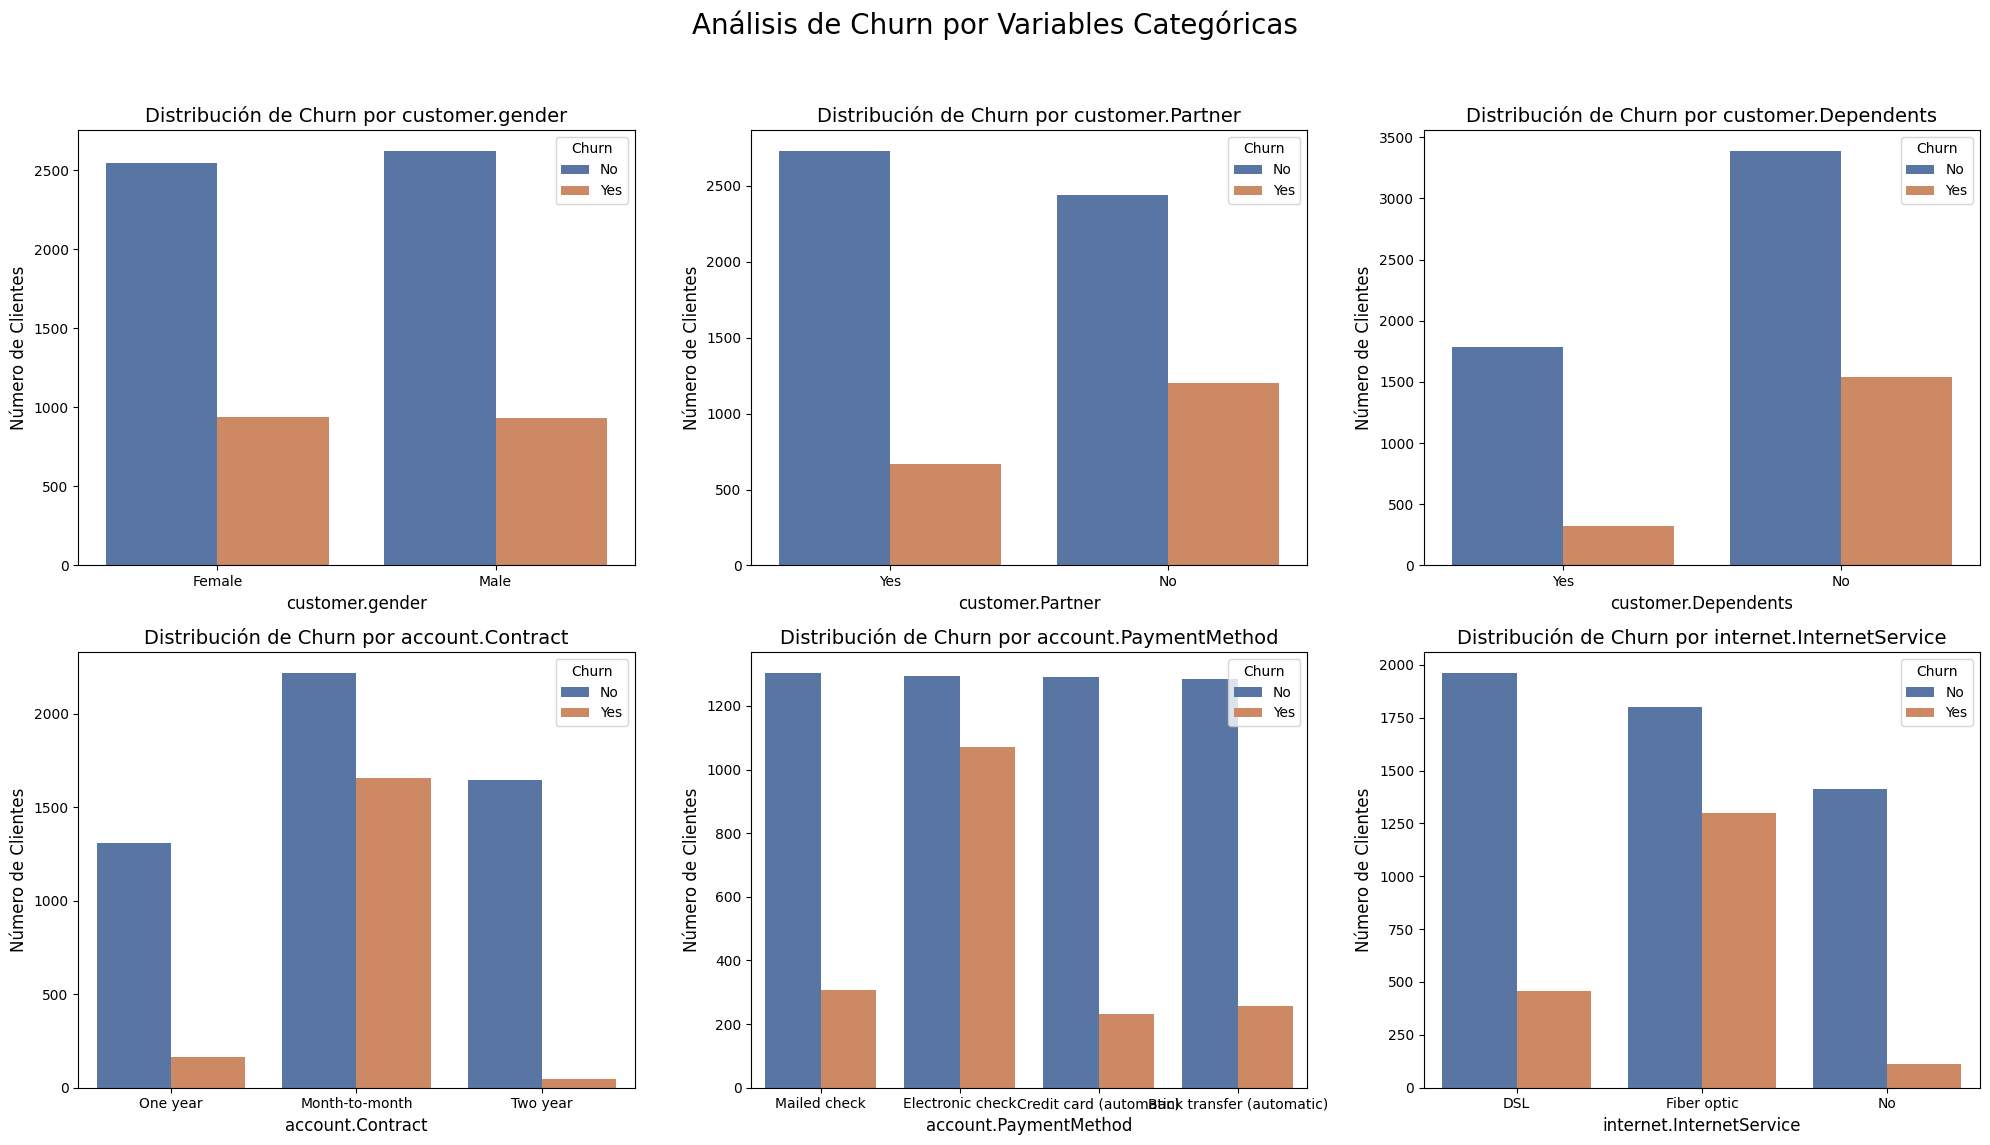

3.1 Distribución General de la Evasión (Churn)
El análisis inicial reveló que una parte significativa de la base de clientes está evadiendo el servicio.

Aproximadamente el 26.5% de los clientes se ha dado de baja, mientras que el 73.5% ha permanecido con la empresa.

3.2 Análisis de Churn por Variables Categóricas
Las visualizaciones mostraron patrones claros en la evasión según varias características de los clientes.

Tipo de Contrato: Los clientes con contratos mes a mes (Month-to-month) tienen una tasa de evasión notablemente más alta en comparación con los clientes con contratos de uno o dos años. Esto sugiere que la falta de compromiso a largo plazo es un factor de riesgo.

Método de Pago: Los clientes que utilizan cheque electrónico (Electronic check) como método de pago muestran la tasa de evasión más alta.

Servicio de Internet: Los clientes con servicio de fibra óptica (Fiber optic) tienen una mayor probabilidad de cancelar que los que tienen DSL, lo que podría indicar problemas de calidad en ese servicio.

Género: La distribución de Churn entre hombres y mujeres es muy similar, lo que indica que el género no es un factor determinante para la evasión.

3.3 Análisis de Churn por Variables Numéricas
El análisis de las variables numéricas reveló diferencias significativas entre los clientes que cancelan y los que no.

Tiempo de Contrato (tenure): Los clientes que se dan de baja tienen un tiempo de contrato promedio significativamente menor que los clientes que permanecen. La mayoría de los Churners abandonan el servicio en los primeros meses.

Total Gastado (TotalCharges): Debido a su corto tiempo de contrato, los clientes que cancelan tienen un total de gastos acumulados mucho menor.

Cargos Mensuales (MonthlyCharges): Los clientes con una alta evasión tienden a tener cargos mensuales más elevados en comparación con los que se quedan, lo que sugiere una posible insatisfacción con el precio.

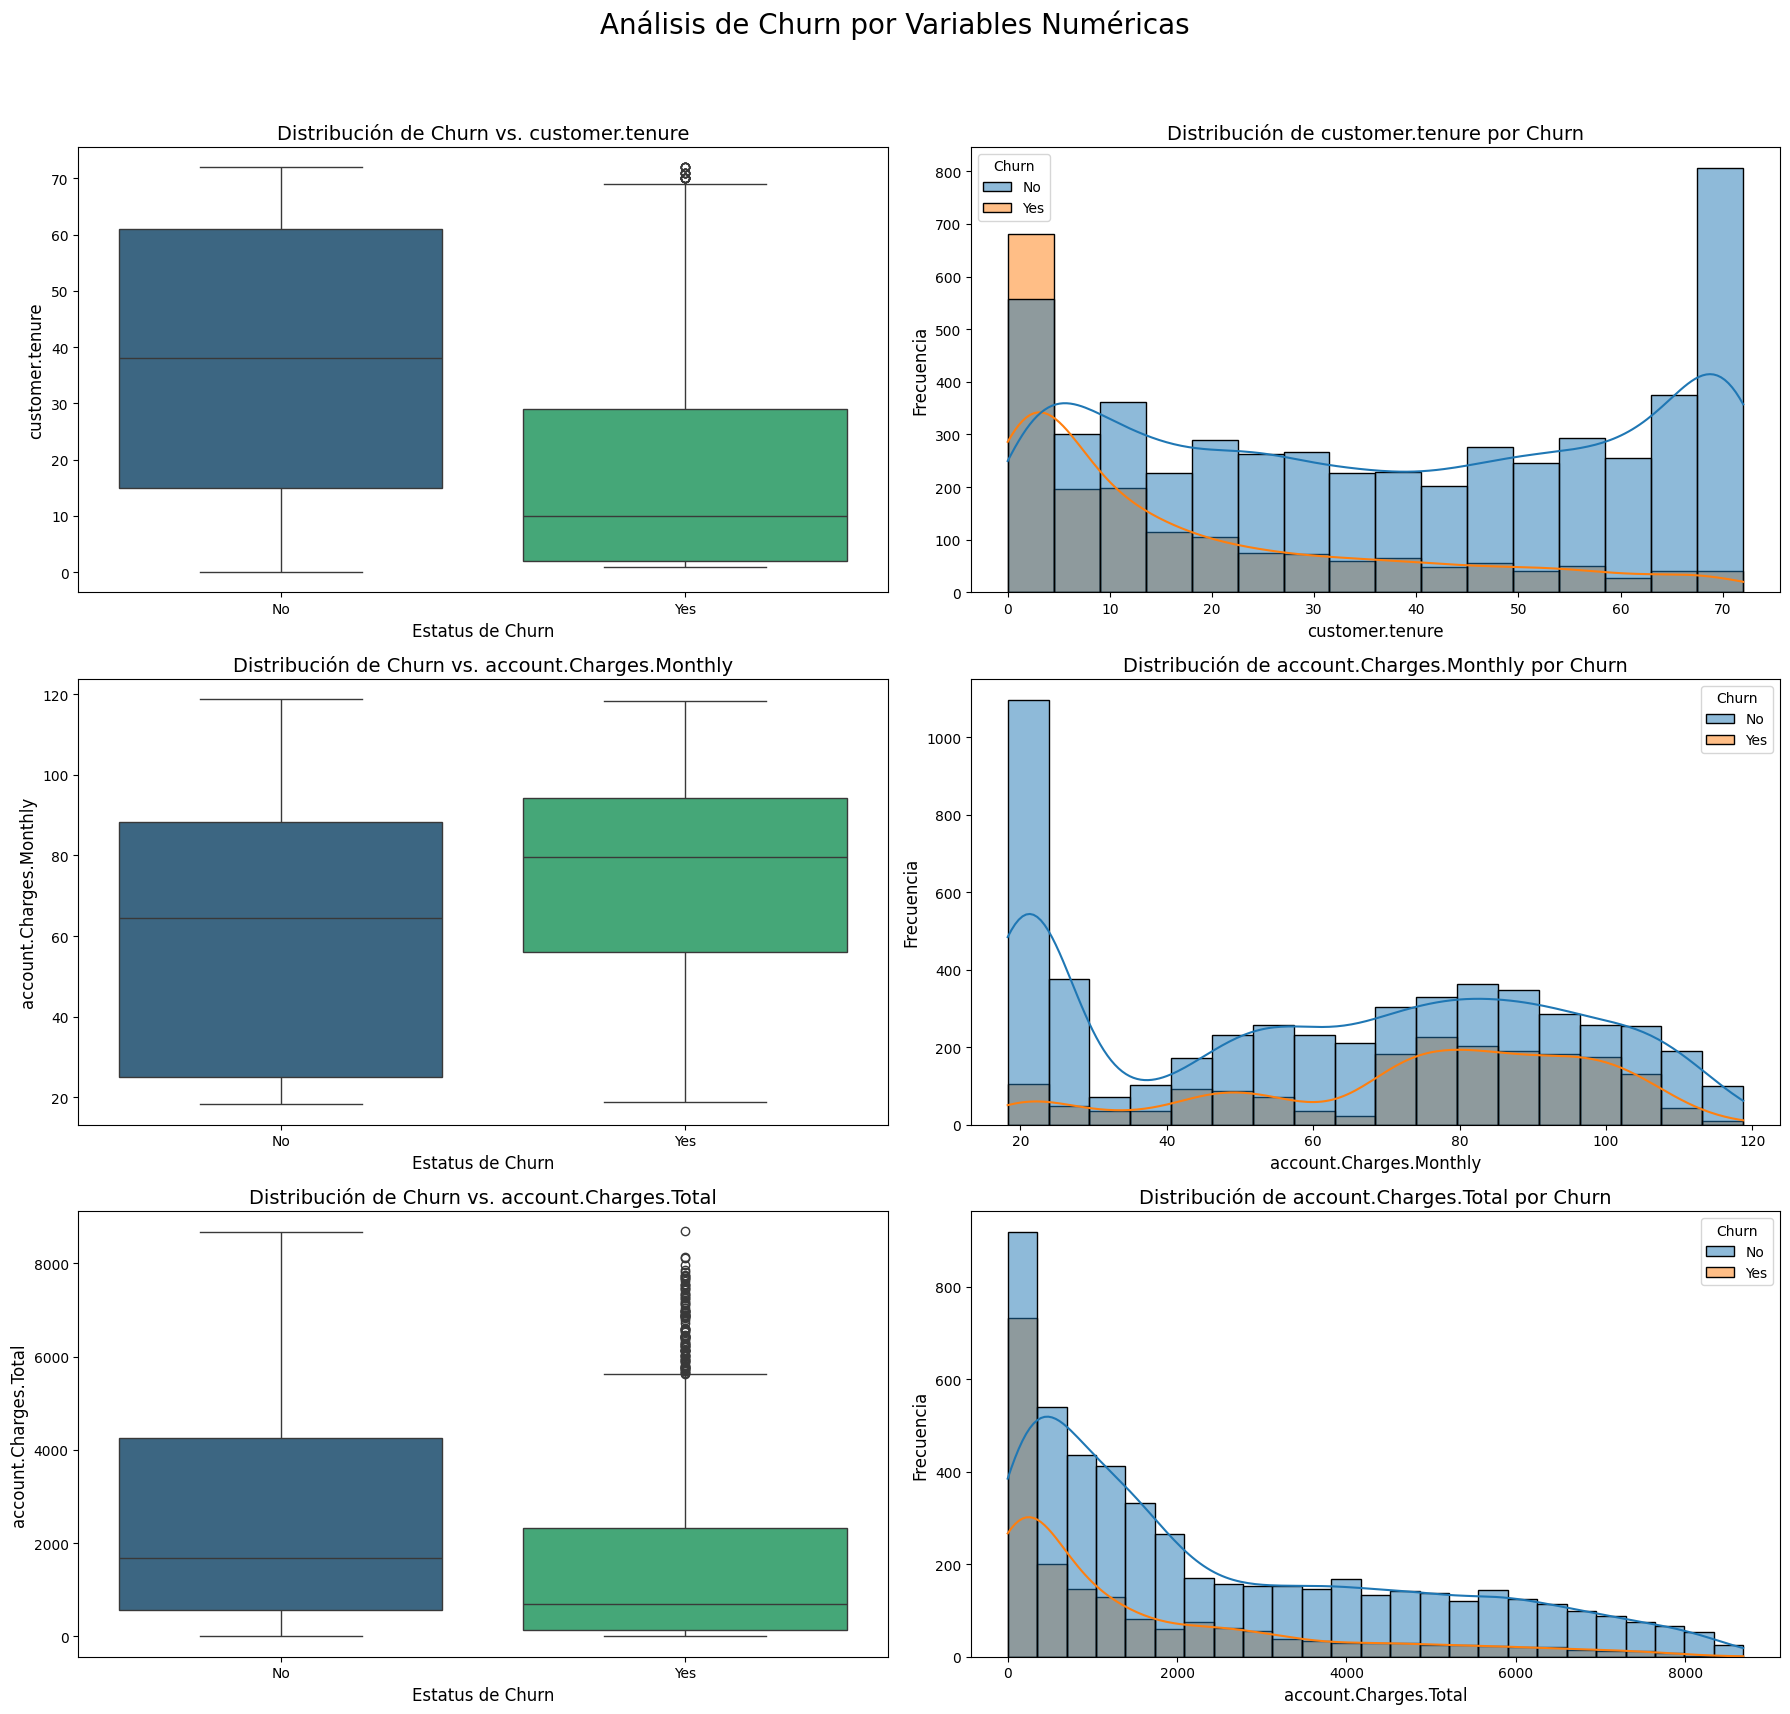

4. Conclusiones e Insights
Los principales hallazgos del análisis son:

La evasión está fuertemente relacionada con el tiempo de contrato y el tipo de contrato. Los clientes nuevos y aquellos con contratos flexibles de mes a mes son los más propensos a irse.

Los clientes que pagan facturas más altas cada mes son más propensos a cancelar, lo que apunta a una posible insatisfacción con el valor percibido del servicio.

Los problemas con los métodos de pago, como el cheque electrónico, podrían ser un factor secundario que contribuye a la evasión.

5. Recomendaciones
Basado en este análisis, se sugieren las siguientes estrategias para reducir la evasión:

Programas de Retención para Nuevos Clientes: Ofrecer un seguimiento proactivo y un servicio de atención al cliente dedicado durante los primeros 3 a 6 meses de contrato, ya que es el período de mayor riesgo de evasión.

Incentivos para Contratos a Largo Plazo: Ofrecer descuentos o beneficios adicionales para animar a los clientes a migrar de contratos mes a mes a contratos de uno o dos años.

Análisis y Optimización de la Facturación: Investigar por qué los clientes con pagos elevados tienen una alta tasa de evasión. Se puede considerar ofrecer planes más competitivos o paquetes personalizados que justifiquen el precio.

Mejora de la Experiencia de Pago: Analizar y mejorar la usabilidad del método de pago por cheque electrónico o promover alternativas más estables para reducir la fricción con los clientes.